In [75]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression # linear regression model
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.metrics import r2_score # for comparing the predicted and test values
from sklearn.linear_model import LogisticRegression

# Preprocessing

* Import the data
* Filter out the patients from ICU Types 2,3 and 4 so that only ICU Type 1 patients remain 
* Filter out ages between 0 and 69 so that only patients aged between 70-90 remain
* Separate the data into Day 1 and Day 2

In [76]:
df = pd.read_csv("Preprocessed ICU data.csv")
df.head()
survived = df['In.hospital_death']
df.head()

,RecordID,Age,Gender,Height,ICUType2,ICUType3,ICUType4,Mean_Weight.x,Mean_GCS.x,Mean_HR.x,...,Max_ALT.y,Max_AST.y,Max_Bilirubin.y,Max_Lactate.y,Max_Cholesterol.y,Max_TroponinI.y,Max_TroponinT.y,SAPS.I,SOFA,In.hospital_death
0,132543,68,1.0,180.300000,0,1,0,84.600000,14.888889,72.971429,...,12.000000,15.000000,0.200000,2.395461,156.842105,7.132683,1.114629,7,1,0
1,132545,88,0.0,169.787227,0,1,0,83.054136,15.000000,79.520000,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,17,2,0
2,132547,64,1.0,180.300000,0,0,0,114.000000,8.333333,81.318182,...,60.000000,162.000000,0.400000,2.395461,212.000000,1.300000,1.114629,14,11,0
3,132551,78,0.0,162.600000,0,1,0,48.400000,13.250000,78.125000,...,46.000000,82.000000,0.300000,2.300000,156.842105,3.500000,1.114629,19,8,1
4,132554,64,0.0,169.787227,0,1,0,60.700000,15.000000,129.363636,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,11,0,0


In [77]:
mortality = survived.mean()
print(mortality)
icutype2 = df[df['ICUType2']==0]
icutype3 = icutype2[icutype2['ICUType3']==0]
icutype1 = icutype3[icutype3['ICUType4']==0]
icutype1.describe()

0.3758480325644505


,RecordID,Age,Gender,Height,ICUType2,ICUType3,ICUType4,Mean_Weight.x,Mean_GCS.x,Mean_HR.x,...,Max_ALT.y,Max_AST.y,Max_Bilirubin.y,Max_Lactate.y,Max_Cholesterol.y,Max_TroponinI.y,Max_TroponinT.y,SAPS.I,SOFA,In.hospital_death
count,242.000000,242.000000,242.000000,242.000000,242.0,242.0,242.0,242.000000,242.000000,242.000000,...,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,137409.194215,74.301653,0.528926,170.174905,0.0,0.0,0.0,77.868220,11.787078,82.941088,...,209.722355,359.468956,1.544315,2.654493,157.299478,7.548355,1.774846,14.330579,6.293388,0.334711
std,3079.301246,12.635158,0.500197,22.111094,0.0,0.0,0.0,20.265714,3.785583,16.459199,...,520.217441,1250.395362,1.014484,1.754507,21.975180,5.613639,2.760257,6.009520,4.357551,0.472867
min,132547.000000,29.000000,0.000000,142.200000,0.0,0.0,0.0,2.187500,3.000000,45.937500,...,4.000000,13.000000,0.100000,0.500000,85.000000,0.300000,0.020000,-1.000000,-1.000000,0.000000
25%,134592.250000,68.000000,0.000000,163.225000,0.0,0.0,0.0,64.252083,8.333333,71.664160,...,45.000000,68.000000,0.700000,2.323865,156.842105,7.132683,1.114629,11.000000,3.000000,0.000000
50%,137077.500000,77.000000,1.000000,169.787227,0.0,0.0,0.0,79.500000,14.166667,81.262539,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,14.000000,6.000000,0.000000
75%,140011.250000,83.750000,1.000000,172.700000,0.0,0.0,0.0,86.920714,15.000000,94.422241,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,18.000000,10.000000,1.000000
max,142659.000000,90.000000,1.000000,419.100000,0.0,0.0,0.0,165.000000,15.000000,132.230769,...,4940.000000,15680.000000,9.600000,14.900000,307.000000,43.400000,22.510000,27.000000,18.000000,1.000000


In [78]:
df_age = icutype1['Age']
df_age

2       64
5       77
17      77
19      77
26      61
        ..
1445    89
1446    62
1451    79
1456    68
1468    88
Name: Age, Length: 242, dtype: int64

,Gender
Age,
29,1
34,1
36,2
37,1
42,1
43,1
44,1
46,2
47,1


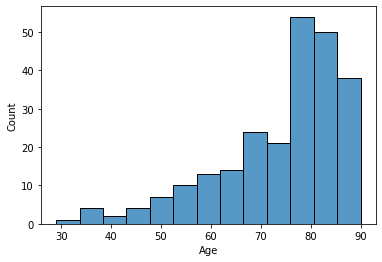

In [79]:
ages = icutype1['Age'].unique()
sns.histplot(data=icutype1,x='Age')
ages
np.sort(ages)[::1]

icutype1.pivot_table(index='Age',values='Gender',aggfunc='count')

In [80]:
# agegroup1 = icutype1[icutype1['Age']<55]
# agegroup = icutype1[icutype1['Age']>55]
# agegroup2 = agegroup[agegroup['Age']<63]
# agegroupa = icutype1[icutype1['Age']>62]
# agegroup3 = agegroupa[agegroupa['Age']<70]
# agegroupb = icutype1[icutype1['Age']>69]
# agegroup4 = agegroupb[agegroupb['Age']<74]
# agegroupc = icutype1[icutype1['Age']>73]
# agegroup5 = agegroupc[agegroupc['Age']<77]
# agegroupd = icutype1[icutype1['Age']>76]
# agegroup6 = agegroupd[agegroupd['Age']<79]
# agegroupe = icutype1[icutype1['Age']>78]
# agegroup7 = agegroupe[agegroupe['Age']<81]
# agegroupf = icutype1[icutype1['Age']>80]
# agegroup8 = agegroupf[agegroupf['Age']<84]
# agegroupg = icutype1[icutype1['Age']>83]
# agegroup9 = agegroupg[agegroupg['Age']<86]
# agegrouph = icutype1[icutype1['Age']>85]
# agegroup10 = agegrouph[agegrouph['Age']<90]
# agegroup11 = icutype1[icutype1['Age']==90]

agerange = icutype1[icutype1['Age']>69]
agerange.rename(columns = {"In.hospital_death":"In_hospital_death"},inplace = True)
agerange['Mean_UrinePKG.x'] = agerange['Mean_Urine.x'].div(agerange['Mean_Weight.x'])
agerange['Mean_UrinePKG.y'] = agerange['Mean_Urine.y'].div(agerange['Mean_Weight.y'])
agerange.sort_values(by=['Mean_UrinePKG.x'],ascending=False)
agerange.index[42]
agerange = agerange.drop(agerange.index[42])

agerange.sort_values(by=['Mean_UrinePKG.x'],ascending=False)


C:\Users\Fiona\.conda\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\Fiona\AppData\Local\Temp/ipykernel_13712/2737499813.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agerange['Mean_UrinePKG.x'] = agerange['Mean_Urine.x'].div(agerange['Mean_Weight.x'])
C:\Users\Fiona\AppData\Local\Temp/ipykernel_13712/2737499813.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,RecordID,Age,Gender,Height,ICUType2,ICUType3,ICUType4,Mean_Weight.x,Mean_GCS.x,Mean_HR.x,...,Max_Bilirubin.y,Max_Lactate.y,Max_Cholesterol.y,Max_TroponinI.y,Max_TroponinT.y,SAPS.I,SOFA,In_hospital_death,Mean_UrinePKG.x,Mean_UrinePKG.y
148,133600,72,1.0,170.200000,0,0,0,79.100000,13.666667,95.384615,...,1.200000,4.300000,156.842105,7.132683,1.114629,14,6,0,5.520438,1.573255
333,134802,77,1.0,157.500000,0,0,0,70.000000,14.500000,102.214286,...,1.979557,2.395461,156.842105,7.132683,1.114629,14,3,0,5.301587,2.174603
700,137284,78,1.0,172.700000,0,0,0,88.000000,14.571429,69.565217,...,1.979557,2.395461,88.000000,7.132683,14.110000,13,4,0,4.176136,1.017045
1017,139289,85,1.0,177.800000,0,0,0,91.130435,15.000000,66.705882,...,1.400000,2.395461,146.000000,7.132683,1.114629,13,1,0,4.060115,6.161325
679,137073,90,0.0,152.400000,0,0,0,47.600000,14.750000,63.909091,...,1.979557,2.395461,163.000000,6.600000,1.114629,12,4,0,3.939076,0.735294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,135210,80,1.0,172.700000,0,0,0,99.646809,15.000000,77.083333,...,1.979557,4.600000,156.842105,7.132683,1.114629,-1,11,1,0.134593,0.199611
1116,140029,81,0.0,169.787227,0,0,0,77.000000,7.666667,79.357143,...,2.500000,1.700000,156.842105,1.400000,1.114629,26,12,1,0.067821,0.399600
529,136102,77,1.0,169.787227,0,0,0,90.700000,3.428571,111.500000,...,1.700000,4.200000,156.842105,7.132683,1.100000,27,18,1,0.067727,0.079934
870,138364,75,1.0,149.900000,0,0,0,71.888000,10.666667,79.712121,...,0.300000,0.500000,160.000000,7.132683,0.590000,27,14,1,0.000000,1.041667


In [81]:
variables = agerange[['Age','In_hospital_death','Mean_Weight.x','Mean_Weight.y','Mean_RespRate.x','Mean_RespRate.y','Mean_HR.x','Mean_HR.y','Mean_Temp.x','Mean_Temp.y','Mean_Cholesterol.x','Mean_Cholesterol.y','Mean_Glucose.x','Mean_Glucose.y','Mean_NISysABP.x','Mean_NISysABP.y','Mean_SysABP.x','Mean_SysABP.y','Mean_DiasABP.x','Mean_DiasABP.y','Mean_UrinePKG.x','Mean_UrinePKG.y']]

variables1 = variables[['Age','Mean_Weight.x','Mean_RespRate.x','Mean_HR.x','Mean_Temp.x','Mean_Cholesterol.x','Mean_Glucose.x','Mean_NISysABP.x','Mean_SysABP.x', 'Mean_DiasABP.x','Mean_UrinePKG.x', 'In_hospital_death']]
variables2 = variables[['Age','Mean_Weight.y','Mean_RespRate.y','Mean_HR.y','Mean_Temp.y','Mean_Cholesterol.y','Mean_Glucose.y','Mean_NISysABP.y','Mean_SysABP.y','Mean_DiasABP.y', 'Mean_UrinePKG.y', 'In_hospital_death']]


# Variables

<AxesSubplot:>

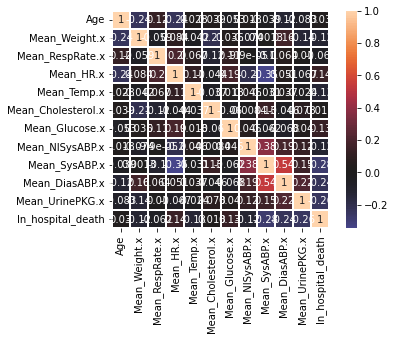

In [82]:
corr = variables1.corr()
sns.heatmap(corr, annot = True, center = 0, square = True, linewidths = 2.0)

# Heart Rate

<AxesSubplot:xlabel='Mean_HR.x', ylabel='Count'>

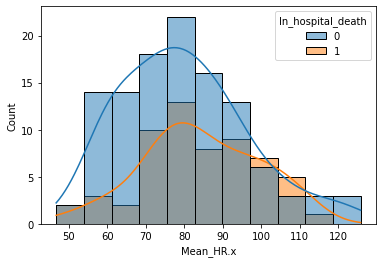

In [83]:
#heart rate
sns.histplot(data = agerange, x = 'Mean_HR.x', hue = 'In_hospital_death', kde = True)

In [84]:
X = agerange[["Mean_HR.x"]]
Y = agerange['In_hospital_death'] 

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

logistic = LogisticRegression(fit_intercept=True) # instantatiate the linear regression model
logistic.fit(X_train,Y_train) # fit the data to the model

print("Intercept is",np.round(logistic.intercept_,2))
print("Coefficients are",np.round(logistic.coef_, 2))


Intercept is [-1.95]
Coefficients are [[0.02]]


In [85]:
#above 1: decreasing the odds | below 1: increasing the odds
print("Intercept is",np.round(np.exp(logistic.intercept_),5))
print("Coefficients are",np.round(np.exp(logistic.coef_), 2))

Intercept is [0.14292]
Coefficients are [[1.02]]


In [86]:
pred_probs = logistic.predict_proba(X_train) #get predicted probabilities 
pred_probs = pd.DataFrame(pred_probs)
pred_probs["death"] = np.where(pred_probs[1] > 0.5, 1, 0)
pred_probs["true"] = Y_train.reset_index().In_hospital_death

pred_probs

,0,1,death,true
0,0.672771,0.327229,0,1
1,0.701395,0.298605,0,0
2,0.623648,0.376352,0,1
3,0.612900,0.387100,0,1
4,0.753373,0.246627,0,0
...,...,...,...,...
134,0.545107,0.454893,0,0
135,0.615660,0.384340,0,0
136,0.517382,0.482618,0,0
137,0.677912,0.322088,0,1


In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_probs['true'],pred_probs['death'])

0.6258992805755396

In [88]:
test_preds = logistic.predict_proba(X_test)
test_preds = pd.DataFrame(test_preds)
test_preds['test_death'] = np.where(test_preds[1] > 0.5, 1, 0)
test_preds["true"] = Y_test.reset_index().In_hospital_death
accuracy_score(test_preds['true'],test_preds['test_death'])

0.6857142857142857

<AxesSubplot:xlabel='Mean_HR.x', ylabel='In_hospital_death'>

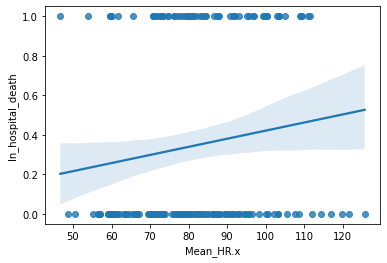

In [89]:
sns.regplot(data = agerange, x = 'Mean_HR.x', y = 'In_hospital_death')

# Respiratory rate

<AxesSubplot:xlabel='Mean_RespRate.x', ylabel='Count'>

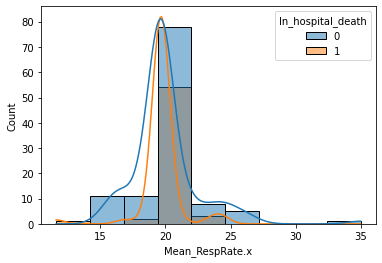

In [90]:
#respiratory rate
sns.histplot(data = agerange , x = 'Mean_RespRate.x', hue = 'In_hospital_death', kde = True)

In [91]:
X = agerange[["Mean_RespRate.x"]]
Y = agerange['In_hospital_death'] 

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

logistic = LogisticRegression(fit_intercept=True) # instantatiate the linear regression model
logistic.fit(X_train,Y_train) # fit the data to the model

print("Intercept is",np.round(logistic.intercept_,2))
print("Coefficients are",np.round(logistic.coef_, 2))

Intercept is [-0.66]
Coefficients are [[0.]]


In [92]:
#above 1: decreasing the odds | below 1: increasing the odds
print("Intercept is",np.round(np.exp(logistic.intercept_),5))
print("Coefficients are",np.round(np.exp(logistic.coef_), 2))

Intercept is [0.5165]
Coefficients are [[1.]]


In [93]:
pred_probs = logistic.predict_proba(X_train) #get predicted probabilities 
pred_probs = pd.DataFrame(pred_probs)
pred_probs["death"] = np.where(pred_probs[1] > 0.5, 1, 0)
pred_probs["true"] = Y_train.reset_index().In_hospital_death

pred_probs

,0,1,death,true
0,0.647519,0.352481,0,1
1,0.647519,0.352481,0,0
2,0.647519,0.352481,0,1
3,0.644816,0.355184,0,1
4,0.649379,0.350621,0,0
...,...,...,...,...
134,0.647519,0.352481,0,0
135,0.647519,0.352481,0,0
136,0.647519,0.352481,0,0
137,0.647519,0.352481,0,1


In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_probs['true'],pred_probs['death'])

0.6474820143884892

In [95]:
test_preds = logistic.predict_proba(X_test)
test_preds = pd.DataFrame(test_preds)
test_preds['test_death'] = np.where(test_preds[1] > 0.5, 1, 0)
test_preds["true"] = Y_test.reset_index().In_hospital_death
accuracy_score(test_preds['true'],test_preds['test_death'])

0.6857142857142857

# Temperature

<AxesSubplot:xlabel='Mean_Temp.x', ylabel='Count'>

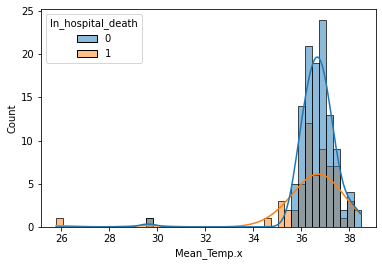

In [96]:
#Temperature
sns.histplot(data = agerange, x = 'Mean_Temp.x', hue = 'In_hospital_death', kde = True)

In [97]:
X = agerange[["Mean_Temp.x"]]
Y = agerange['In_hospital_death'] 

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

logistic = LogisticRegression(fit_intercept=True) # instantatiate the linear regression model
logistic.fit(X_train,Y_train) # fit the data to the model

print("Intercept is",np.round(logistic.intercept_,2))
print("Coefficients are",np.round(logistic.coef_, 2))

Intercept is [13.33]
Coefficients are [[-0.38]]


In [98]:
#above 1: decreasing the odds | below 1: increasing the odds
print("Intercept is",np.round(np.exp(logistic.intercept_),5))
print("Coefficients are",np.round(np.exp(logistic.coef_), 2))

Intercept is [618344.92715]
Coefficients are [[0.68]]


In [99]:
pred_probs = logistic.predict_proba(X_train) #get predicted probabilities 
pred_probs = pd.DataFrame(pred_probs)
pred_probs["death"] = np.where(pred_probs[1] > 0.5, 1, 0)
pred_probs["true"] = Y_train.reset_index().In_hospital_death

pred_probs

,0,1,death,true
0,0.648025,0.351975,0,1
1,0.591038,0.408962,0,0
2,0.685218,0.314782,0,1
3,0.686099,0.313901,0,1
4,0.655955,0.344045,0,0
...,...,...,...,...
134,0.614766,0.385234,0,0
135,0.716044,0.283956,0,0
136,0.751744,0.248256,0,0
137,0.698506,0.301494,0,1


In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_probs['true'],pred_probs['death'])

0.6690647482014388

In [101]:
test_preds = logistic.predict_proba(X_test)
test_preds = pd.DataFrame(test_preds)
test_preds['test_death'] = np.where(test_preds[1] > 0.5, 1, 0)
test_preds["true"] = Y_test.reset_index().In_hospital_death
accuracy_score(test_preds['true'],test_preds['test_death'])

0.6571428571428571

# Cholesterol

<AxesSubplot:xlabel='Mean_Cholesterol.x', ylabel='Count'>

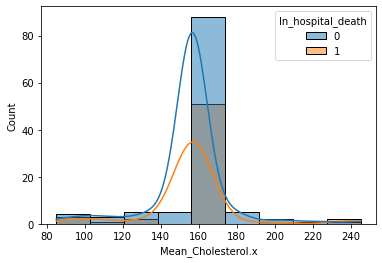

In [102]:
#cholesterol
sns.histplot(data = agerange, x = 'Mean_Cholesterol.x', hue = 'In_hospital_death', kde = True)

In [103]:
X = agerange[["Mean_Cholesterol.x"]]
Y = agerange['In_hospital_death'] 

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

logistic = LogisticRegression(fit_intercept=True) # instantatiate the linear regression model
logistic.fit(X_train,Y_train) # fit the data to the model

print("Intercept is",np.round(logistic.intercept_,2))
print("Coefficients are",np.round(logistic.coef_, 2))

Intercept is [-0.]
Coefficients are [[-0.]]


In [104]:
#above 1: decreasing the odds | below 1: increasing the odds
print("Intercept is",np.round(np.exp(logistic.intercept_),5))
print("Coefficients are",np.round(np.exp(logistic.coef_), 2))

Intercept is [0.99997]
Coefficients are [[1.]]


In [105]:
pred_probs = logistic.predict_proba(X_train) #get predicted probabilities 
pred_probs = pd.DataFrame(pred_probs)
pred_probs["death"] = np.where(pred_probs[1] > 0.5, 1, 0)
pred_probs["true"] = Y_train.reset_index().In_hospital_death

pred_probs

,0,1,death,true
0,0.647547,0.352453,0,1
1,0.647547,0.352453,0,0
2,0.647547,0.352453,0,1
3,0.647547,0.352453,0,1
4,0.647547,0.352453,0,0
...,...,...,...,...
134,0.647547,0.352453,0,0
135,0.647547,0.352453,0,0
136,0.662844,0.337156,0,0
137,0.647547,0.352453,0,1


In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_probs['true'],pred_probs['death'])

0.6474820143884892

In [107]:
test_preds = logistic.predict_proba(X_test)
test_preds = pd.DataFrame(test_preds)
test_preds['test_death'] = np.where(test_preds[1] > 0.5, 1, 0)
test_preds["true"] = Y_test.reset_index().In_hospital_death
accuracy_score(test_preds['true'],test_preds['test_death'])

0.6857142857142857

# Glucose

<AxesSubplot:xlabel='Mean_Glucose.x', ylabel='Count'>

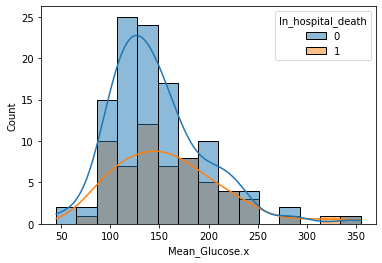

In [108]:
#glucose
sns.histplot(data = agerange, x = 'Mean_Glucose.x', hue = 'In_hospital_death', kde = True)

In [109]:
X = agerange[["Mean_Glucose.x"]]
Y = agerange['In_hospital_death'] 

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

logistic = LogisticRegression(fit_intercept=True) # instantatiate the linear regression model
logistic.fit(X_train,Y_train) # fit the data to the model

print("Intercept is",np.round(logistic.intercept_,2))
print("Coefficients are",np.round(logistic.coef_, 2))

Intercept is [-1.78]
Coefficients are [[0.01]]


In [110]:
#above 1: decreasing the odds | below 1: increasing the odds
print("Intercept is",np.round(np.exp(logistic.intercept_),5))
print("Coefficients are",np.round(np.exp(logistic.coef_), 2))

Intercept is [0.16869]
Coefficients are [[1.01]]


In [111]:
pred_probs = logistic.predict_proba(X_train) #get predicted probabilities 
pred_probs = pd.DataFrame(pred_probs)
pred_probs["death"] = np.where(pred_probs[1] > 0.5, 1, 0)
pred_probs["true"] = Y_train.reset_index().In_hospital_death

pred_probs

,0,1,death,true
0,0.726398,0.273602,0,1
1,0.625780,0.374220,0,0
2,0.487587,0.512413,1,1
3,0.509813,0.490187,0,1
4,0.556306,0.443694,0,0
...,...,...,...,...
134,0.690429,0.309571,0,0
135,0.651997,0.348003,0,0
136,0.505393,0.494607,0,0
137,0.655856,0.344144,0,1


In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_probs['true'],pred_probs['death'])

0.6618705035971223

In [113]:
test_preds = logistic.predict_proba(X_test)
test_preds = pd.DataFrame(test_preds)
test_preds['test_death'] = np.where(test_preds[1] > 0.5, 1, 0)
test_preds["true"] = Y_test.reset_index().In_hospital_death
accuracy_score(test_preds['true'],test_preds['test_death'])

0.6571428571428571

# Invasive systolic arterial blood pressure

<AxesSubplot:xlabel='Mean_SysABP.x', ylabel='Count'>

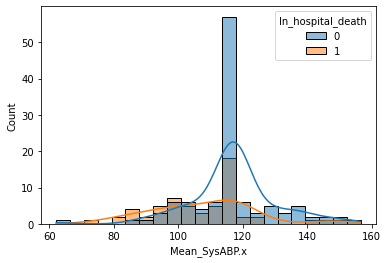

In [114]:
#sysAPB
sns.histplot(data = agerange, x = 'Mean_SysABP.x', hue = 'In_hospital_death', kde = True)

In [115]:
X = agerange[["Mean_SysABP.x"]]
Y = agerange['In_hospital_death'] 

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

logistic = LogisticRegression(fit_intercept=True) # instantatiate the linear regression model
logistic.fit(X_train,Y_train) # fit the data to the model

print("Intercept is",np.round(logistic.intercept_,2))
print("Coefficients are",np.round(logistic.coef_, 2))

Intercept is [3.61]
Coefficients are [[-0.04]]


In [116]:
#above 1: decreasing the odds | below 1: increasing the odds
print("Intercept is",np.round(np.exp(logistic.intercept_),5))
print("Coefficients are",np.round(np.exp(logistic.coef_), 2))

Intercept is [37.04566]
Coefficients are [[0.96]]


In [117]:
pred_probs = logistic.predict_proba(X_train) #get predicted probabilities 
pred_probs = pd.DataFrame(pred_probs)
pred_probs["death"] = np.where(pred_probs[1] > 0.5, 1, 0)
pred_probs["true"] = Y_train.reset_index().In_hospital_death

pred_probs

,0,1,death,true
0,0.686235,0.313765,0,1
1,0.686235,0.313765,0,0
2,0.423550,0.576450,1,1
3,0.407196,0.592804,1,1
4,0.826743,0.173257,0,0
...,...,...,...,...
134,0.686235,0.313765,0,0
135,0.888882,0.111118,0,0
136,0.414660,0.585340,1,0
137,0.528158,0.471842,0,1


In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_probs['true'],pred_probs['death'])

0.697841726618705

In [119]:
test_preds = logistic.predict_proba(X_test)
test_preds = pd.DataFrame(test_preds)
test_preds['test_death'] = np.where(test_preds[1] > 0.5, 1, 0)
test_preds["true"] = Y_test.reset_index().In_hospital_death
accuracy_score(test_preds['true'],test_preds['test_death'])

0.7142857142857143

# Invasive diastolic arterial blood pressure

<AxesSubplot:xlabel='Mean_DiasABP.x', ylabel='Count'>

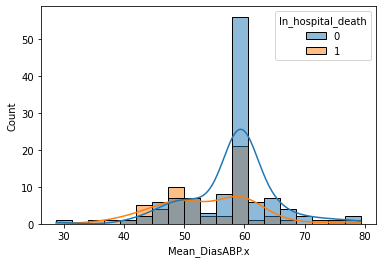

In [120]:
#diasAPB
sns.histplot(data = agerange, x = 'Mean_DiasABP.x', hue = 'In_hospital_death', kde = True)

In [121]:
X = agerange[["Mean_DiasABP.x"]]
Y = agerange['In_hospital_death'] 

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

logistic = LogisticRegression(fit_intercept=True) # instantatiate the linear regression model
logistic.fit(X_train,Y_train) # fit the data to the model

print("Intercept is",np.round(logistic.intercept_,2))
print("Coefficients are",np.round(logistic.coef_, 2))

Intercept is [2.16]
Coefficients are [[-0.05]]


In [122]:
#above 1: decreasing the odds | below 1: increasing the odds
print("Intercept is",np.round(np.exp(logistic.intercept_),5))
print("Coefficients are",np.round(np.exp(logistic.coef_), 2))

Intercept is [8.67267]
Coefficients are [[0.95]]


In [123]:
pred_probs = logistic.predict_proba(X_train) #get predicted probabilities 
pred_probs = pd.DataFrame(pred_probs)
pred_probs["death"] = np.where(pred_probs[1] > 0.5, 1, 0)
pred_probs["true"] = Y_train.reset_index().In_hospital_death

pred_probs

,0,1,death,true
0,0.682517,0.317483,0,1
1,0.682517,0.317483,0,0
2,0.528060,0.471940,0,1
3,0.497339,0.502661,1,1
4,0.639056,0.360944,0,0
...,...,...,...,...
134,0.682517,0.317483,0,0
135,0.722790,0.277210,0,0
136,0.567085,0.432915,0,0
137,0.495238,0.504762,1,1


In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_probs['true'],pred_probs['death'])

0.6618705035971223

In [125]:
test_preds = logistic.predict_proba(X_test)
test_preds = pd.DataFrame(test_preds)
test_preds['test_death'] = np.where(test_preds[1] > 0.5, 1, 0)
test_preds["true"] = Y_test.reset_index().In_hospital_death
accuracy_score(test_preds['true'],test_preds['test_death'])

0.7142857142857143

# Weight

<AxesSubplot:xlabel='Mean_Weight.x', ylabel='Count'>

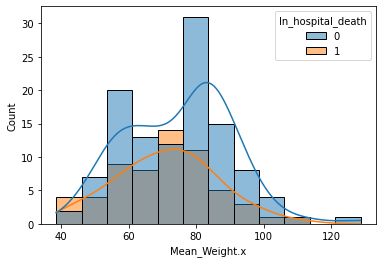

In [126]:
#weight
sns.histplot(data = agerange, x = 'Mean_Weight.x', hue = 'In_hospital_death', kde = True)

In [127]:
X = agerange[["Mean_Weight.x"]]
Y = agerange['In_hospital_death'] 

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

logistic = LogisticRegression(fit_intercept=True) # instantatiate the linear regression model
logistic.fit(X_train,Y_train) # fit the data to the model

print("Intercept is",np.round(logistic.intercept_,2))
print("Coefficients are",np.round(logistic.coef_, 2))

Intercept is [0.45]
Coefficients are [[-0.01]]


In [128]:
#above 1: decreasing the odds | below 1: increasing the odds
print("Intercept is",np.round(np.exp(logistic.intercept_),5))
print("Coefficients are",np.round(np.exp(logistic.coef_), 2))

Intercept is [1.56939]
Coefficients are [[0.99]]


In [129]:
pred_probs = logistic.predict_proba(X_train) #get predicted probabilities 
pred_probs = pd.DataFrame(pred_probs)
pred_probs["death"] = np.where(pred_probs[1] > 0.5, 1, 0)
pred_probs["true"] = Y_train.reset_index().In_hospital_death

pred_probs

,0,1,death,true
0,0.673724,0.326276,0,1
1,0.556596,0.443404,0,0
2,0.646217,0.353783,0,1
3,0.613079,0.386921,0,1
4,0.700085,0.299915,0,0
...,...,...,...,...
134,0.642911,0.357089,0,0
135,0.598802,0.401198,0,0
136,0.632580,0.367420,0,0
137,0.632915,0.367085,0,1


In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_probs['true'],pred_probs['death'])

0.6474820143884892

In [131]:
test_preds = logistic.predict_proba(X_test)
test_preds = pd.DataFrame(test_preds)
test_preds['test_death'] = np.where(test_preds[1] > 0.5, 1, 0)
test_preds["true"] = Y_test.reset_index().In_hospital_death
accuracy_score(test_preds['true'],test_preds['test_death'])

0.6857142857142857

# Urine

<AxesSubplot:xlabel='Mean_UrinePKG.x', ylabel='Count'>

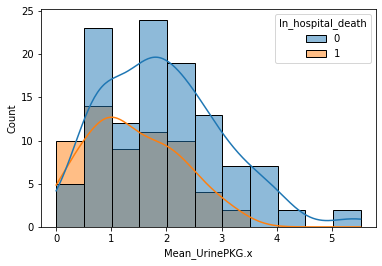

In [132]:
#urine
sns.histplot(data = agerange, x = 'Mean_UrinePKG.x', hue = 'In_hospital_death', kde = True)

In [133]:
X = agerange[["Mean_UrinePKG.x"]]
Y = agerange['In_hospital_death'] 

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

logistic = LogisticRegression(fit_intercept=True) # instantatiate the linear regression model
logistic.fit(X_train,Y_train) # fit the data to the model

print("Intercept is",np.round(logistic.intercept_,2))
print("Coefficients are",np.round(logistic.coef_, 2))

Intercept is [0.32]
Coefficients are [[-0.57]]


In [134]:
#above 1: decreasing the odds | below 1: increasing the odds
print("Intercept is",np.round(np.exp(logistic.intercept_),5))
print("Coefficients are",np.round(np.exp(logistic.coef_), 2))

Intercept is [1.37541]
Coefficients are [[0.56]]


In [135]:
pred_probs = logistic.predict_proba(X_train) #get predicted probabilities 
pred_probs = pd.DataFrame(pred_probs)
pred_probs["death"] = np.where(pred_probs[1] > 0.5, 1, 0)
pred_probs["true"] = Y_train.reset_index().In_hospital_death

pred_probs

,0,1,death,true
0,0.704618,0.295382,0,1
1,0.719730,0.280270,0,0
2,0.697542,0.302458,0,1
3,0.812758,0.187242,0,1
4,0.722103,0.277897,0,0
...,...,...,...,...
134,0.748002,0.251998,0,0
135,0.556864,0.443136,0,0
136,0.760042,0.239958,0,0
137,0.537217,0.462783,0,1


In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_probs['true'],pred_probs['death'])

0.6762589928057554

In [137]:
test_preds = logistic.predict_proba(X_test)
test_preds = pd.DataFrame(test_preds)
test_preds['test_death'] = np.where(test_preds[1] > 0.5, 1, 0)
test_preds["true"] = Y_test.reset_index().In_hospital_death
accuracy_score(test_preds['true'],test_preds['test_death'])

0.7428571428571429

# Standardising Values

In [138]:
#respiratory rate standard arrays

RespRateStandard1 = []
RespRateStandard2 = []

for rate in variables['Mean_RespRate.x']:
    if rate in range(12,17):
        RespRateStandard1.append(0)
    else:
        RespRateStandard1.append(1) 

for rate in variables['Mean_RespRate.y']:
    if rate in range(12,17):
        RespRateStandard2.append(0)
    else:
        RespRateStandard2.append(1)

In [139]:
#heartrate standard array

HRStandard1 = []
HRStandard2 = []

for rate in variables['Mean_HR.x']:
    if rate in range(60,101):
        HRStandard1.append(0)
    else:
        HRStandard1.append(1) 

for rate in variables['Mean_HR.y']:
    if rate in range(60,101):
        HRStandard2.append(0)
    else:
        HRStandard2.append(1)

In [140]:
#cholesterol standard array

CholesterolStandard1 = []
CholesterolStandard2 = []

for value in variables['Mean_Cholesterol.x']:
    if value in range(200,240):
        CholesterolStandard1.append(0)
    else:
        CholesterolStandard1.append(1)

for value in variables['Mean_Cholesterol.y']:
    if value in range(200,240):
        CholesterolStandard2.append(0)
    else:
        CholesterolStandard2.append(1)

In [141]:
#glucose standard array

GlucoseStandard1 = []
GlucoseStandard2 = []

for value in variables['Mean_Glucose.x']:
    if value in range(0,141):
        GlucoseStandard1.append(0)
    else:
        GlucoseStandard1.append(1)

for value in variables['Mean_Glucose.y']:
    if value in range(0,141):
        GlucoseStandard2.append(0)
    else:
        GlucoseStandard2.append(1)

In [142]:
#SysABP standard array

SysABPStandard1 = []
SysABPStandard2 = []

for pressure in variables['Mean_SysABP.x']:
    if pressure in range(90,120):
        SysABPStandard1.append(0)
    else:
        SysABPStandard1.append(1)

for pressure in variables['Mean_SysABP.y']:
    if pressure in range(90,120):
        SysABPStandard2.append(0)
    else:
        SysABPStandard2.append(1)

In [143]:
#DiasABP standard array

DiasABPStandard1 = []
DiasABPStandard2 = []

for pressure in variables['Mean_DiasABP.x']:
    if pressure in range(60,80):
        DiasABPStandard1.append(0)
    else:
        DiasABPStandard1.append(1)

for pressure in variables['Mean_DiasABP.y']:
    if pressure in range(60,80):
        DiasABPStandard2.append(0)
    else:
        DiasABPStandard2.append(1)

In [144]:
#urine standard array

UrineStandard1 = []
UrineStandard2 = []

for value in variables['Mean_UrinePKG.x']:
    if value in np.arange(0.5,1.5):
        UrineStandard1.append(0)
    else:
        UrineStandard1.append(1)

for value in variables['Mean_UrinePKG.y']:
    if value in np.arange(0.5,1.5):
        UrineStandard2.append(0)
    else:
        UrineStandard2.append(1)

In [145]:
#temperature standard array

TempStandard1 = []
TempStandard2 = []

for temp in variables['Mean_Temp.x']:
    if temp in range(36,38):
        TempStandard1.append(0)
    else:
        TempStandard1.append(1)

for temp in variables['Mean_Temp.y']:
    if temp in range(36,38):
        TempStandard2.append(0)
    else:
        TempStandard2.append(1)

# Multiple Regression Model

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

z = [0,1,2,3]
Z = np.vander(z, 4)
print(Z)

[[ 0  0  0  1]
 [ 1  1  1  1]
 [ 8  4  2  1]
 [27  9  3  1]]


In [147]:
rng = np.random.RandomState(1)
reg_ord = 4
model = LinearRegression(fit_intercept=True)        #set up regression
model.fit(np.vander(x,reg_ord+1),y)                 #fit poly model 
yfit = model.predict(np.vander(xfit,reg_ord+1))     #get model predictions for plotting
y_pred = model.predict(np.vander(x_test,reg_ord+1)) #get model predictions on test data 
rsquared_quartic = r2_score(y_test,y_pred)          #get r2 on test set
plt.scatter(x_test,y_test, label='samples')
plt.plot(xfit,cos_fun(xfit), label='model')
plt.plot(xfit,yfit, label='quartic')                 #plot regression line                       
plt.legend()
plt.xlabel('x')
plt.title("Quartic Regression Rsq=%5.3f" % (rsquared_quartic));

NameError: name 'x' is not defined

In [ ]:
print("Model coefficients:  ", np.round(model.coef_[0:-1],3))
print("Model intercept:   %5.3f    " % model.intercept_)

quadcoefs = np.log10(abs(model.coef_[0:reg_ord])) #for later example

In [ ]:
rng = np.random.RandomState(1)
reg_ord = 15;
model = LinearRegression(fit_intercept=True)
model.fit(np.vander(x,reg_ord+1),y)
yfit = model.predict(np.vander(xfit,reg_ord+1))
y_pred = model.predict(np.vander(x_test,reg_ord+1))
rsquared = r2_score(y_test,y_pred)
plt.scatter(x_test,y_test, label='samples')
plt.plot(xfit,yfit, label='15th order poly')
plt.plot(xfit,cos_fun(xfit), label='model')
plt.legend()
plt.xlabel('x')
plt.title("Fifteenth Order Regression Rsq=%5.3f" % (rsquared));

In [ ]:
training = np.zeros(15)
testing = np.zeros(15)
for ord in range(1,16):
    rng = np.random.RandomState(1)
    reg_ord = ord;
    model = LinearRegression(fit_intercept=True).fit(np.vander(x,reg_ord+1),y)
    training[ord-1] = model.score(np.vander(x,reg_ord+1),y)
    y_pred = model.predict(np.vander(x_test,reg_ord+1))
    testing[ord-1] = r2_score(y_test,y_pred)

plt.scatter(range(1,16), training, label='Training score')
plt.scatter(range(1,16), testing, label='Testing score')
plt.legend()
plt.xlabel('Order of polynomial')
plt.ylim((.7, 1.))
plt.title('Model accuracy');